> **University of Pisa** \
> **M.Sc. Computer Science, Artificial Intelligence** \
> **Continual learning 2022/23** \
> **Authors**
* Andrea Iommi - a.iommi2@studenti.unipi.it

# Memory Replay GANs
# Learning to generate images from new categories without forgetting
#### [(original paper)](https://proceedings.neurips.cc/paper/2018/hash/a57e8915461b83adefb011530b711704-Abstract.html)
### Notebooks
*   Classical acGAN in offline settings
*   **Classical acGAN in online settings**
*   acGAN with join retrain
*   acGAN with replay alignment


In [1]:
import torch
from Trainer import Trainer
from Utils import custom_mnist
from Plot_functions import generate_classes, plot_history

In [2]:
config = dict(
    device="cuda" if torch.cuda.is_available() else "cpu",
    num_classes=10,
    img_size=32,
    channels=1,
    n_epochs=30,
    batch_size=64,
    embedding=100, # latent dimension of embedding
    lr_g=0.0002, # Learning rate for generator
    lr_d=0.0002 # Learning rate for discriminator
)

## Classical acGAN in online settings (training)
We create a classical acGAN in online setting, this time instead we build multiple experiences. More precisely, we have 3 experience: the first one contains the number 0-2, the second one 3-5 and the last one 6-9. The model at each experience **see only the current digits** and this leads to a **Catastrophic forgetting**.

In [3]:
experiences = [[0,1,2],[3,4,5],[6,7,8,9]] # list of experiences
exp_generator = custom_mnist(experiences = experiences)
trainer = Trainer(config=config)
history = trainer.fit_classic(experiences=exp_generator, create_gif=False)

Dataset found...
Experience --  1 numbers [0, 1, 2]


100%|██████████| 291/291 [00:07<00:00, 36.91it/s]


[1/30] Loss_D: 1.0873 Loss_G: 1.1109 Acc 0.960317


100%|██████████| 291/291 [00:06<00:00, 47.72it/s]


[2/30] Loss_D: 1.0830 Loss_G: 1.0979 Acc 0.992063


100%|██████████| 291/291 [00:06<00:00, 47.47it/s]


[3/30] Loss_D: 1.0916 Loss_G: 1.0966 Acc 0.984127


100%|██████████| 291/291 [00:06<00:00, 47.66it/s]


[4/30] Loss_D: 1.0655 Loss_G: 1.0878 Acc 1.000000


100%|██████████| 291/291 [00:06<00:00, 47.17it/s]


[5/30] Loss_D: 1.0728 Loss_G: 1.0931 Acc 0.984127


100%|██████████| 291/291 [00:06<00:00, 45.51it/s]


[6/30] Loss_D: 1.0843 Loss_G: 1.0924 Acc 1.000000


100%|██████████| 291/291 [00:06<00:00, 45.99it/s]


[7/30] Loss_D: 1.0973 Loss_G: 1.0938 Acc 0.992063


100%|██████████| 291/291 [00:06<00:00, 47.56it/s]


[8/30] Loss_D: 1.0634 Loss_G: 1.0896 Acc 0.992063


100%|██████████| 291/291 [00:06<00:00, 47.03it/s]


[9/30] Loss_D: 1.0761 Loss_G: 1.0842 Acc 1.000000


100%|██████████| 291/291 [00:06<00:00, 46.78it/s]


[10/30] Loss_D: 1.0730 Loss_G: 1.0919 Acc 0.984127


100%|██████████| 291/291 [00:06<00:00, 47.58it/s]


[11/30] Loss_D: 1.0719 Loss_G: 1.1176 Acc 1.000000


100%|██████████| 291/291 [00:06<00:00, 46.71it/s]


[12/30] Loss_D: 1.0850 Loss_G: 1.0950 Acc 1.000000


100%|██████████| 291/291 [00:06<00:00, 46.81it/s]


[13/30] Loss_D: 1.0819 Loss_G: 1.0826 Acc 0.992063


100%|██████████| 291/291 [00:06<00:00, 47.32it/s]


[14/30] Loss_D: 1.0825 Loss_G: 1.0628 Acc 1.000000


100%|██████████| 291/291 [00:06<00:00, 46.07it/s]


[15/30] Loss_D: 1.0910 Loss_G: 1.0731 Acc 0.992063


100%|██████████| 291/291 [00:06<00:00, 46.18it/s]


[16/30] Loss_D: 1.0994 Loss_G: 1.0619 Acc 0.992063


100%|██████████| 291/291 [00:06<00:00, 47.36it/s]


[17/30] Loss_D: 1.0956 Loss_G: 1.0835 Acc 1.000000


100%|██████████| 291/291 [00:06<00:00, 47.60it/s]


[18/30] Loss_D: 1.0816 Loss_G: 1.0702 Acc 0.992063


100%|██████████| 291/291 [00:06<00:00, 47.18it/s]


[19/30] Loss_D: 1.0689 Loss_G: 1.1042 Acc 0.992063


100%|██████████| 291/291 [00:06<00:00, 46.93it/s]


[20/30] Loss_D: 1.0765 Loss_G: 1.0822 Acc 0.992063


100%|██████████| 291/291 [00:06<00:00, 47.03it/s]


[21/30] Loss_D: 1.0796 Loss_G: 1.1198 Acc 1.000000


100%|██████████| 291/291 [00:06<00:00, 46.96it/s]


[22/30] Loss_D: 1.0417 Loss_G: 1.0888 Acc 1.000000


100%|██████████| 291/291 [00:06<00:00, 47.15it/s]


[23/30] Loss_D: 1.0659 Loss_G: 1.1121 Acc 0.984127


100%|██████████| 291/291 [00:06<00:00, 47.44it/s]


[24/30] Loss_D: 1.0762 Loss_G: 1.0724 Acc 0.992063


100%|██████████| 291/291 [00:06<00:00, 47.32it/s]


[25/30] Loss_D: 1.1013 Loss_G: 1.0607 Acc 0.992063


100%|██████████| 291/291 [00:06<00:00, 47.15it/s]


[26/30] Loss_D: 1.0643 Loss_G: 1.0825 Acc 1.000000


100%|██████████| 291/291 [00:06<00:00, 46.86it/s]


[27/30] Loss_D: 1.0682 Loss_G: 1.0718 Acc 0.992063


100%|██████████| 291/291 [00:06<00:00, 46.74it/s]


[28/30] Loss_D: 1.0863 Loss_G: 1.0792 Acc 0.992063


100%|██████████| 291/291 [00:06<00:00, 46.80it/s]


[29/30] Loss_D: 1.0883 Loss_G: 1.0630 Acc 1.000000


100%|██████████| 291/291 [00:06<00:00, 46.44it/s]


[30/30] Loss_D: 1.0765 Loss_G: 1.0838 Acc 1.000000
Experience --  2 numbers [3, 4, 5]


100%|██████████| 272/272 [00:05<00:00, 47.14it/s]


[1/30] Loss_D: 1.0465 Loss_G: 1.1512 Acc 1.000000


100%|██████████| 272/272 [00:05<00:00, 46.60it/s]


[2/30] Loss_D: 1.0623 Loss_G: 1.1323 Acc 0.980000


100%|██████████| 272/272 [00:05<00:00, 46.94it/s]


[3/30] Loss_D: 1.0683 Loss_G: 1.1219 Acc 0.990000


100%|██████████| 272/272 [00:05<00:00, 46.22it/s]


[4/30] Loss_D: 1.0738 Loss_G: 1.1294 Acc 0.960000


100%|██████████| 272/272 [00:05<00:00, 46.89it/s]


[5/30] Loss_D: 1.0889 Loss_G: 1.0910 Acc 0.970000


100%|██████████| 272/272 [00:05<00:00, 46.99it/s]


[6/30] Loss_D: 1.0957 Loss_G: 1.1152 Acc 0.990000


100%|██████████| 272/272 [00:05<00:00, 46.88it/s]


[7/30] Loss_D: 1.1016 Loss_G: 1.0882 Acc 0.980000


100%|██████████| 272/272 [00:05<00:00, 47.14it/s]


[8/30] Loss_D: 1.0962 Loss_G: 1.1085 Acc 0.980000


100%|██████████| 272/272 [00:05<00:00, 46.76it/s]


[9/30] Loss_D: 1.0552 Loss_G: 1.1041 Acc 1.000000


100%|██████████| 272/272 [00:05<00:00, 47.20it/s]


[10/30] Loss_D: 1.0730 Loss_G: 1.1350 Acc 0.990000


100%|██████████| 272/272 [00:05<00:00, 46.89it/s]


[11/30] Loss_D: 1.0766 Loss_G: 1.0781 Acc 1.000000


100%|██████████| 272/272 [00:05<00:00, 47.32it/s]


[12/30] Loss_D: 1.0660 Loss_G: 1.0951 Acc 1.000000


100%|██████████| 272/272 [00:05<00:00, 47.39it/s]


[13/30] Loss_D: 1.0687 Loss_G: 1.1061 Acc 0.990000


100%|██████████| 272/272 [00:05<00:00, 47.32it/s]


[14/30] Loss_D: 1.0604 Loss_G: 1.0757 Acc 0.990000


100%|██████████| 272/272 [00:05<00:00, 47.01it/s]


[15/30] Loss_D: 1.0839 Loss_G: 1.1066 Acc 0.990000


100%|██████████| 272/272 [00:05<00:00, 47.59it/s]


[16/30] Loss_D: 1.0849 Loss_G: 1.0591 Acc 0.980000


100%|██████████| 272/272 [00:05<00:00, 48.01it/s]


[17/30] Loss_D: 1.1033 Loss_G: 1.0789 Acc 1.000000


100%|██████████| 272/272 [00:05<00:00, 47.26it/s]


[18/30] Loss_D: 1.0554 Loss_G: 1.0461 Acc 1.000000


100%|██████████| 272/272 [00:05<00:00, 47.90it/s]


[19/30] Loss_D: 1.0537 Loss_G: 1.1314 Acc 1.000000


100%|██████████| 272/272 [00:05<00:00, 46.59it/s]


[20/30] Loss_D: 1.0798 Loss_G: 1.0567 Acc 0.990000


100%|██████████| 272/272 [00:05<00:00, 46.94it/s]


[21/30] Loss_D: 1.0605 Loss_G: 1.1078 Acc 0.990000


100%|██████████| 272/272 [00:05<00:00, 47.57it/s]


[22/30] Loss_D: 1.0887 Loss_G: 1.1058 Acc 0.990000


100%|██████████| 272/272 [00:05<00:00, 47.53it/s]


[23/30] Loss_D: 1.0967 Loss_G: 1.0615 Acc 0.990000


100%|██████████| 272/272 [00:05<00:00, 47.33it/s]


[24/30] Loss_D: 1.0772 Loss_G: 1.0834 Acc 1.000000


100%|██████████| 272/272 [00:05<00:00, 47.19it/s]


[25/30] Loss_D: 1.0586 Loss_G: 1.1031 Acc 1.000000


100%|██████████| 272/272 [00:05<00:00, 47.40it/s]


[26/30] Loss_D: 1.0808 Loss_G: 1.1078 Acc 1.000000


100%|██████████| 272/272 [00:05<00:00, 47.32it/s]


[27/30] Loss_D: 1.0659 Loss_G: 1.0504 Acc 0.980000


100%|██████████| 272/272 [00:05<00:00, 47.32it/s]


[28/30] Loss_D: 1.0691 Loss_G: 1.0864 Acc 1.000000


100%|██████████| 272/272 [00:05<00:00, 46.74it/s]


[29/30] Loss_D: 1.1270 Loss_G: 1.0367 Acc 0.990000


100%|██████████| 272/272 [00:05<00:00, 46.97it/s]


[30/30] Loss_D: 1.0818 Loss_G: 1.1129 Acc 0.990000
Experience --  3 numbers [6, 7, 8, 9]


100%|██████████| 375/375 [00:07<00:00, 46.90it/s]


[1/30] Loss_D: 1.2174 Loss_G: 1.2794 Acc 0.723404


100%|██████████| 375/375 [00:07<00:00, 46.91it/s]


[2/30] Loss_D: 1.1285 Loss_G: 1.4168 Acc 0.851064


100%|██████████| 375/375 [00:07<00:00, 47.49it/s]


[3/30] Loss_D: 1.1443 Loss_G: 1.2398 Acc 0.872340


100%|██████████| 375/375 [00:07<00:00, 47.52it/s]


[4/30] Loss_D: 1.0842 Loss_G: 1.3280 Acc 0.925532


100%|██████████| 375/375 [00:07<00:00, 47.43it/s]


[5/30] Loss_D: 1.0120 Loss_G: 1.1506 Acc 0.957447


100%|██████████| 375/375 [00:07<00:00, 47.33it/s]


[6/30] Loss_D: 1.0745 Loss_G: 1.1961 Acc 0.936170


100%|██████████| 375/375 [00:08<00:00, 46.47it/s]


[7/30] Loss_D: 1.0646 Loss_G: 1.1025 Acc 0.968085


100%|██████████| 375/375 [00:08<00:00, 46.34it/s]


[8/30] Loss_D: 1.0598 Loss_G: 1.0313 Acc 0.978723


100%|██████████| 375/375 [00:08<00:00, 45.69it/s]


[9/30] Loss_D: 1.0349 Loss_G: 1.1719 Acc 0.989362


100%|██████████| 375/375 [00:08<00:00, 46.75it/s]


[10/30] Loss_D: 1.0107 Loss_G: 1.1421 Acc 0.968085


100%|██████████| 375/375 [00:08<00:00, 45.70it/s]


[11/30] Loss_D: 1.0728 Loss_G: 0.9547 Acc 0.978723


100%|██████████| 375/375 [00:08<00:00, 46.50it/s]


[12/30] Loss_D: 1.0506 Loss_G: 0.9785 Acc 1.000000


100%|██████████| 375/375 [00:07<00:00, 46.99it/s]


[13/30] Loss_D: 1.0179 Loss_G: 1.0880 Acc 0.989362


100%|██████████| 375/375 [00:07<00:00, 47.33it/s]


[14/30] Loss_D: 1.0395 Loss_G: 1.1288 Acc 0.978723


100%|██████████| 375/375 [00:07<00:00, 47.40it/s]


[15/30] Loss_D: 1.0716 Loss_G: 1.0503 Acc 0.978723


100%|██████████| 375/375 [00:07<00:00, 47.13it/s]


[16/30] Loss_D: 1.0842 Loss_G: 1.0309 Acc 1.000000


100%|██████████| 375/375 [00:07<00:00, 46.90it/s]


[17/30] Loss_D: 1.0761 Loss_G: 1.1252 Acc 0.989362


100%|██████████| 375/375 [00:08<00:00, 46.35it/s]


[18/30] Loss_D: 1.0703 Loss_G: 1.0696 Acc 1.000000


100%|██████████| 375/375 [00:07<00:00, 46.96it/s]


[19/30] Loss_D: 1.1292 Loss_G: 1.1900 Acc 0.978723


100%|██████████| 375/375 [00:08<00:00, 46.50it/s]


[20/30] Loss_D: 1.0208 Loss_G: 1.2338 Acc 0.989362


100%|██████████| 375/375 [00:07<00:00, 47.45it/s]


[21/30] Loss_D: 1.1568 Loss_G: 1.1417 Acc 1.000000


100%|██████████| 375/375 [00:07<00:00, 47.00it/s]


[22/30] Loss_D: 1.0303 Loss_G: 1.1452 Acc 0.989362


100%|██████████| 375/375 [00:07<00:00, 47.33it/s]


[23/30] Loss_D: 1.1294 Loss_G: 1.0386 Acc 0.968085


100%|██████████| 375/375 [00:07<00:00, 47.46it/s]


[24/30] Loss_D: 1.0111 Loss_G: 0.9963 Acc 0.978723


100%|██████████| 375/375 [00:07<00:00, 47.10it/s]


[25/30] Loss_D: 1.1114 Loss_G: 1.1428 Acc 1.000000


100%|██████████| 375/375 [00:07<00:00, 47.24it/s]


[26/30] Loss_D: 1.0894 Loss_G: 1.1023 Acc 0.989362


100%|██████████| 375/375 [00:07<00:00, 47.04it/s]


[27/30] Loss_D: 1.0226 Loss_G: 1.1379 Acc 1.000000


100%|██████████| 375/375 [00:07<00:00, 47.18it/s]


[28/30] Loss_D: 1.1707 Loss_G: 1.1701 Acc 0.978723


100%|██████████| 375/375 [00:07<00:00, 47.16it/s]


[29/30] Loss_D: 1.0905 Loss_G: 1.0820 Acc 0.957447


100%|██████████| 375/375 [00:07<00:00, 47.12it/s]

[30/30] Loss_D: 1.0550 Loss_G: 1.1334 Acc 0.989362


## Loss functions and Accuracy
The charts below represent the *loss function* for both Generator and Discriminator. Since we have multiple experiences, the loss functions are assumed a strange behavior. In correspondence of each experience, we can notice 3 visible spikes. This is due to the fact that in the first experience **the model learns the current digits, when the experience changes it learns the new ones and forget the previous ones.** However, the accuracy seems to be high but in really it is performed only with the current digit and no with the previous.

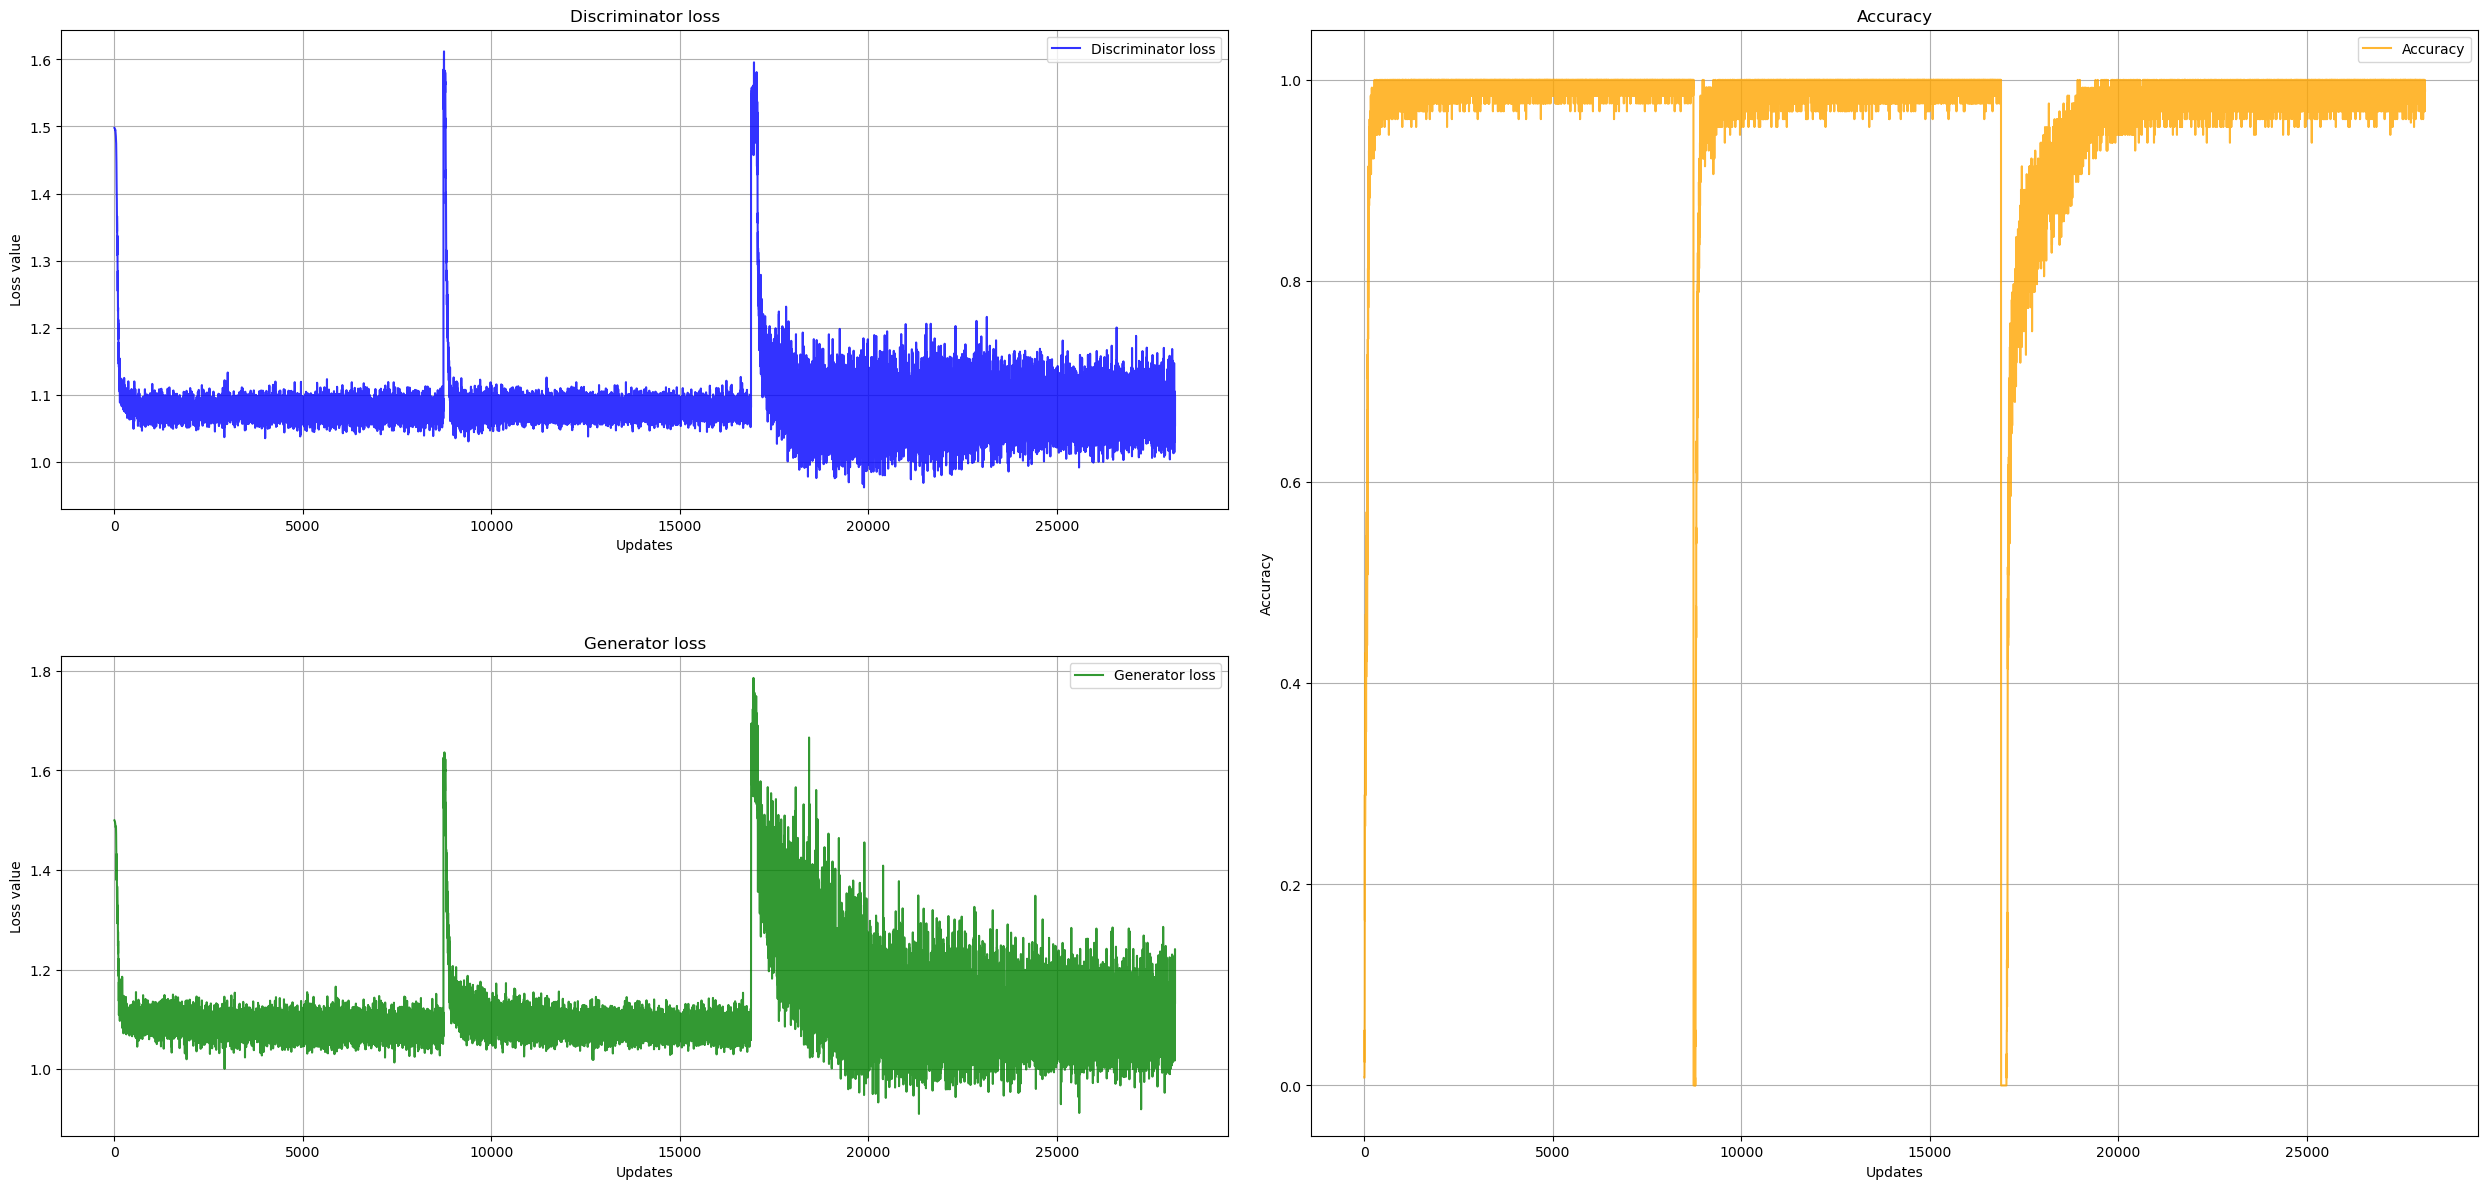

In [4]:
plot_history(history)

## Evaluate the architecture

As we can see, the model is able to generate quite well only the last 4 digits that correspond to the last experience.
Even if the model has seen previous digits thought the experiences, it is no more able to generate them, cause **Catastrophic forgetting**.

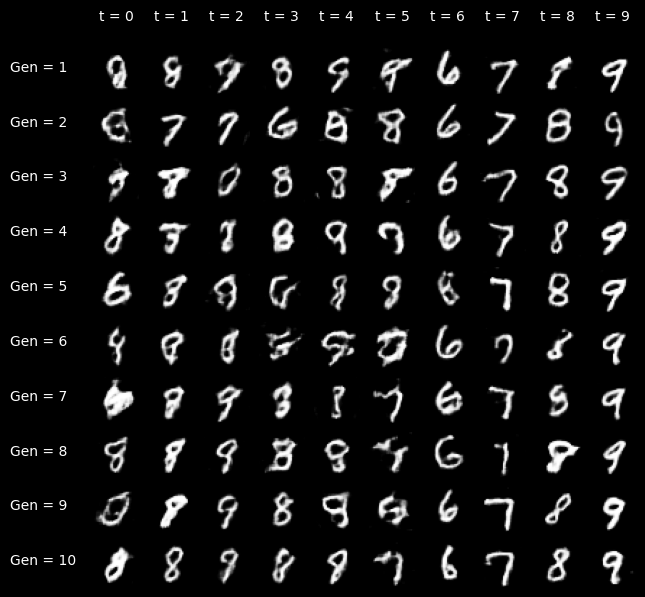

In [5]:
generate_classes(trainer.generator, config["num_classes"], rows=10, device=config["device"])